In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

jour = ["Di", "Lu", "Ma", "Me", "Je", "Ve", "Sa"]
heure = ["0h","1h","2h","3h","4h","5h","6h","7h","8h","9h","10h","11h","12h","13h","14h","15h","16h","17h","18h","19h","20h","21h","22h","23h","NA"]
largeur_contour_graphique = 1.5
df_somme = []
somme_victime_matin_semaine = 0
somme_blesse_leger_matin_semaine = 0
somme_victime_souper_semaine = 0
somme_blesse_leger_souper_semaine = 0

# Création des matrices
hauteur = 25
largeur = 7
df_mort = np.array([[0]*largeur]*hauteur)
df_blesse_grave = np.array([[0]*largeur]*hauteur)
df_blesse_leger = np.array([[0]*largeur]*hauteur)
df_vicitme_total = np.array([[0]*largeur]*hauteur)


# Source de la fonction: https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")
    ax.invert_yaxis()

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=False, bottom=True,
                   labeltop=False, labelbottom=True)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="k", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar

# Lecture du fichier csv
df = pd.read_csv("accidents_2012_2018_lean.csv",delimiter=";")

# Extraction de l'heure
df["HR"] = df["HR_ACCDN"].astype(str).str[:2]

# Remplacement des valeurs No par NA
df.loc[(df["HR"] == "No"),"HR"] = "NA"

# Conversion des jours de la semaine en chiffre (DI = 0, LU = 1, ...,  SA = 6) en créant une nouvelle colonne
df.loc[(df["JR_SEMN_ACCDN"] == "DI"),"JR_SEMN_CODE"] = "0"
df.loc[(df["JR_SEMN_ACCDN"] == "LU"),"JR_SEMN_CODE"] = "1"
df.loc[(df["JR_SEMN_ACCDN"] == "MA"),"JR_SEMN_CODE"] = "2"
df.loc[(df["JR_SEMN_ACCDN"] == "ME"),"JR_SEMN_CODE"] = "3"
df.loc[(df["JR_SEMN_ACCDN"] == "JE"),"JR_SEMN_CODE"] = "4"
df.loc[(df["JR_SEMN_ACCDN"] == "VE"),"JR_SEMN_CODE"] = "5"
df.loc[(df["JR_SEMN_ACCDN"] == "SA"),"JR_SEMN_CODE"] = "6"

# Regroupement du nombre de blessés,morts, etc. par jour par heure
df_jr_hr_victime = df.groupby(["JR_SEMN_CODE","HR"]).agg({"NB_MORTS":"sum","NB_BLESSES_GRAVES":"sum","NB_BLESS_LEGERS":"sum","NB_VICTIMES_TOTAL":"sum"})

# Mise à zero de l'index
df_jr_hr_victime.reset_index(inplace=True)

# Calcul des sommes totales par catégorie (colonne)
df_somme = df_jr_hr_victime.sum(axis=0,skipna=True,numeric_only=True)

# Calcul et impression des statistiques générales
print("#########################################################################################")
print("################################ Statistiques générales #################################")
print("#########################################################################################","\n")
print("--- Statistiques relatives aux accidents de la route entre 2012 et 2018 à Montréal ---\n")
print("Le nombre total de victimes : ",df_somme["NB_VICTIMES_TOTAL"],"\n")

print("Le nombre de blessés légers: ",df_somme["NB_BLESS_LEGERS"])
print("Proportion de blessés légers: ",round(((df_somme["NB_BLESS_LEGERS"]/df_somme["NB_VICTIMES_TOTAL"])*100),2),"%","\n")

print("Le nombre de blessés graves: ",df_somme["NB_BLESSES_GRAVES"])
print("Proportion de blessés graves: ",round(((df_somme["NB_BLESSES_GRAVES"]/df_somme["NB_VICTIMES_TOTAL"])*100),2),"%","\n")

print("Le nombre de morts: ",df_somme["NB_MORTS"])
print("Proportion de morts: ",round(((df_somme["NB_MORTS"]/df_somme["NB_VICTIMES_TOTAL"])*100),2),"%","\n")

#########################################################################################
################################ Statistiques générales #################################
######################################################################################### 

--- Statistiques relatives aux accidents de la route entre 2012 et 2018 à Montréal ---

Le nombre total de victimes :  44436 

Le nombre de blessés légers:  42724
Proportion de blessés légers:  96.15 % 

Le nombre de blessés graves:  1528
Proportion de blessés graves:  3.44 % 

Le nombre de morts:  184
Proportion de morts:  0.41 % 



In [2]:
# Mise à jour des données des matrices
for row in df_jr_hr_victime.index:
    # Mort
    if df_jr_hr_victime["HR"][row] == "NA":
        df_mort[len(df_mort)-len(df_mort)][int(df_jr_hr_victime["JR_SEMN_CODE"][row])] = df_jr_hr_victime["NB_MORTS"][row]
    else:
        df_mort[(len(df_mort) - 1) - (int(df_jr_hr_victime["HR"][row]))][int(df_jr_hr_victime["JR_SEMN_CODE"][row])] = df_jr_hr_victime["NB_MORTS"][row]

    # Blessé grave
    if df_jr_hr_victime["HR"][row] == "NA":
        df_blesse_grave[len(df_blesse_grave)-len(df_blesse_grave)][int(df_jr_hr_victime["JR_SEMN_CODE"][row])] = df_jr_hr_victime["NB_BLESSES_GRAVES"][row]
    else:
        df_blesse_grave[(len(df_blesse_grave) - 1) - (int(df_jr_hr_victime["HR"][row]))][int(df_jr_hr_victime["JR_SEMN_CODE"][row])] = df_jr_hr_victime["NB_BLESSES_GRAVES"][row]
    # Blessé léger
    if df_jr_hr_victime["HR"][row] == "NA":
        df_blesse_leger[len(df_blesse_leger)-len(df_blesse_leger)][int(df_jr_hr_victime["JR_SEMN_CODE"][row])] = df_jr_hr_victime["NB_BLESS_LEGERS"][row]
    else:
        df_blesse_leger[(len(df_blesse_leger) - 1) - (int(df_jr_hr_victime["HR"][row]))][int(df_jr_hr_victime["JR_SEMN_CODE"][row])] = df_jr_hr_victime["NB_BLESS_LEGERS"][row]

    # Victime Totale
    if df_jr_hr_victime["HR"][row] == "NA":
        df_vicitme_total[len(df_vicitme_total)-len(df_vicitme_total)][int(df_jr_hr_victime["JR_SEMN_CODE"][row])] = df_jr_hr_victime["NB_VICTIMES_TOTAL"][row]
    else:
        df_vicitme_total[(len(df_vicitme_total) - 1) - (int(df_jr_hr_victime["HR"][row]))][int(df_jr_hr_victime["JR_SEMN_CODE"][row])] = df_jr_hr_victime["NB_VICTIMES_TOTAL"][row]

# Impression d'un exemple de dataframe utilisé pour les graphiques
print("############################################################")
print("########## Exemple de tableau de données agrégées ##########")
print("############################################################\n")
print("NOTE: L'axe Y a son zero dans le haut. Il va être inversé dans les graphiques.\n")
print(df_vicitme_total,"\n")

############################################################
########## Exemple de tableau de données agrégées ##########
############################################################

NOTE: L'axe Y a son zero dans le haut. Il va être inversé dans les graphiques.

[[ 87 102 108 116 123 151 107]
 [115 112 121 129 183 205 218]
 [142 131 186 194 200 256 204]
 [170 199 207 249 281 244 204]
 [194 216 259 225 253 273 191]
 [259 244 300 258 358 325 259]
 [255 368 419 397 499 493 323]
 [319 489 536 611 664 548 365]
 [326 542 579 636 614 609 388]
 [327 531 513 562 572 609 405]
 [392 394 421 424 407 455 369]
 [308 349 349 354 391 435 374]
 [250 354 348 338 393 373 341]
 [244 322 288 292 296 300 270]
 [201 267 334 290 303 290 253]
 [143 334 321 316 346 318 209]
 [105 392 472 455 443 398 150]
 [ 87 335 389 347 327 333 110]
 [ 71 151 184 159 154 158  70]
 [ 83  68  58  60  77  60  69]
 [123  40  24  36  30  59 115]
 [278  48  32  52  46  86 241]
 [156  37  35  41  36  96 149]
 [158  46  58  65  49  

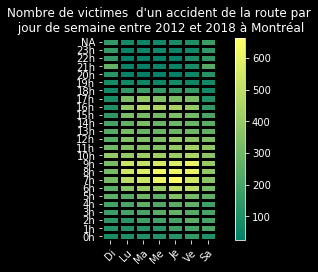

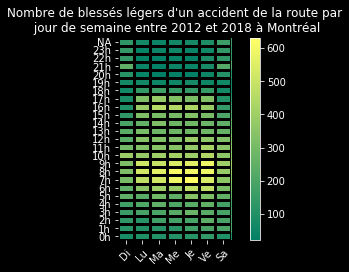

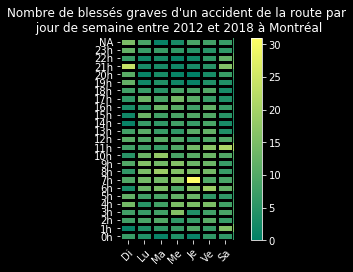

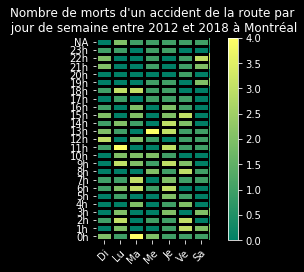

In [3]:
# Mettre l'arrière-plan des graphiques noir
plt.style.use("dark_background")

# Graphique Victime totale
fig, ax = plt.subplots()
heatmap(df_vicitme_total,heure,jour,aspect="0.5",cmap="summer")
plt.title("Nombre de victimes  d'un accident de la route par\n jour de semaine entre 2012 et 2018 à Montréal")
fig.tight_layout(pad=largeur_contour_graphique)
plt.savefig("Vicime_total.png")

# Graphique Blessé léger
fig, ax = plt.subplots()
heatmap(df_blesse_leger,heure,jour,aspect="0.5",cmap="summer")
plt.title("Nombre de blessés légers d'un accident de la route par\n jour de semaine entre 2012 et 2018 à Montréal")
fig.tight_layout(pad=largeur_contour_graphique)
plt.savefig("Blesse_leger.png")

# Graphique Blessé grave
fig, ax = plt.subplots()
heatmap(df_blesse_grave,heure,jour,aspect="0.5",cmap="summer")
plt.title("Nombre de blessés graves d'un accident de la route par\n jour de semaine entre 2012 et 2018 à Montréal")
fig.tight_layout(pad=largeur_contour_graphique)
plt.savefig("Blesse_grave.png")

# Graphique mort
fig, ax = plt.subplots()
heatmap(df_mort,heure,jour,aspect="0.5",cmap="summer")
plt.title("Nombre de morts d'un accident de la route par\n jour de semaine entre 2012 et 2018 à Montréal")
fig.tight_layout(pad=largeur_contour_graphique)
plt.savefig("Mort.png")

# Affichage de tous les graphiques
plt.show()

In [4]:
# Calcul après analyse des graphiques
# Matin de semaine (7h à 9h inclus)
somme_victime_matin_semaine = df_vicitme_total[7:10,1:-1].sum()
somme_blesse_leger_matin_semaine = df_blesse_leger[7:10,1:-1].sum()
# Souper de semaine (16h à 17h inclus)
somme_victime_souper_semaine = df_vicitme_total[16:18,1:-1].sum()
somme_blesse_leger_souper_semaine = df_blesse_leger[16:18,1:-1].sum()

# Impression des statistiques détaillées
print("######################################################################")
print("######## Statistiques détaillées après analyse des graphiques ########")
print("######################################################################\n")
print("--- De 7h à 9h59 ---")
print("Nombre de victimes: ",somme_victime_matin_semaine)
print("Proportion de victimes selon le total de victimes: ",round((somme_victime_matin_semaine/df_somme["NB_VICTIMES_TOTAL"])*100,2),"%\n")

print("Nombre de blessés légers: ",somme_blesse_leger_matin_semaine)
print("Proportion de blessés légers selon le total de blessés légers: ",round((somme_blesse_leger_matin_semaine/df_somme["NB_BLESS_LEGERS"])*100,2),"%\n")

print("--- De 16h à 17h59 ---")
print("Nombre de victimes: ",somme_victime_souper_semaine)
print("Proportion de victimes selon le total de victimes: ",round((somme_victime_souper_semaine/df_somme["NB_VICTIMES_TOTAL"])*100,2),"%\n")

print("Nombre de blessés légers: ",somme_blesse_leger_souper_semaine)
print("Proportion de blessés légers selon le total de blessés légers: ",round((somme_blesse_leger_souper_semaine/df_somme["NB_BLESS_LEGERS"])*100,2),"%\n")

######################################################################
######## Statistiques détaillées après analyse des graphiques ########
######################################################################

--- De 7h à 9h59 ---
Nombre de victimes:  8615
Proportion de victimes selon le total de victimes:  19.39 %

Nombre de blessés légers:  8354
Proportion de blessés légers selon le total de blessés légers:  19.55 %

--- De 16h à 17h59 ---
Nombre de victimes:  3891
Proportion de victimes selon le total de victimes:  8.76 %

Nombre de blessés légers:  3778
Proportion de blessés légers selon le total de blessés légers:  8.84 %

